In [173]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [230]:
import numpy as np
import pandas as pd
import datetime
import calendar

In [175]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [176]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [177]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [178]:
# reflect an existing database into a new model
Base= automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables

['measurement', 'station']

In [160]:
# We can view all of the classes that automap found


In [179]:
# Save references to each table
M=Base.classes.measurement
S=Base.classes.station

In [180]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


Text(0.5, 0, 'Total')

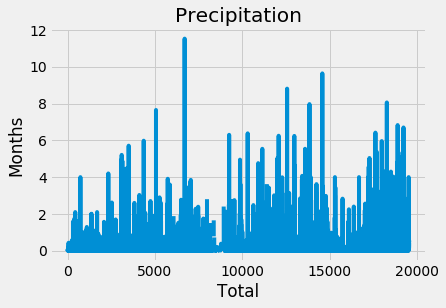

In [232]:
precipitation= session.query(M.prcp).filter(M.date).all()
plt.plot(precipitation)
plt.title("Precipitation")
plt.ylabel("Months")
plt.xlabel("Total")

In [182]:
precipitation_date= session.query(M.prcp, M.date).all()
precipitation_date_df=pd.DataFrame(precipitation_date)
precipitation_date_index_df=precipitation_date_df.set_index(["date"])
precipitation_date_index_df

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [183]:
precipitation_date_index_df.sort_index(ascending=False)

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2010-01-01,0.05
2010-01-01,0.15
2010-01-01,0.15


In [184]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_date_index_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [185]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(S.id).count()
station_count

9

In [249]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations=session.query(M.id,M.station,func.count(M.station)).group_by(M.station).all()
stations.sort(reverse=True)
stations

[(16939, 'USC00516128', 2612),
 (14960, 'USC00511918', 1979),
 (12188, 'USC00519281', 2772),
 (9519, 'USC00519523', 2669),
 (9008, 'USC00518838', 511),
 (7636, 'USC00517948', 1372),
 (5434, 'USC00514830', 2202),
 (2725, 'USC00513117', 2709),
 (1, 'USC00519397', 2724)]

In [285]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_high=session.query(func.max(M.tobs),M.station).filter(M.station=="USC00519281").all()
temp_high

[(85.0, 'USC00519281')]

In [286]:
temp_min=session.query(func.min(M.tobs),M.station).filter(M.station=="USC00519281").all()
temp_min

[(54.0, 'USC00519281')]

In [287]:
temp_avg=session.query(func.avg(M.tobs),M.station).filter(M.station=="USC00519281").all()
temp_avg

[(71.66378066378067, 'USC00519281')]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observations=session.query(M.tobs).filter(M.station=="USC00519281").all()
temp_observations
plt.hist(temp_observations)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
